In [1]:
%pip install numpy pandas matplotlib seaborn wordcloud nltk


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
train_df = pd.read_csv('train.csv')
# print(df.head())
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
# df.info()
print(f"Dataset Shape: {train_df.shape}")
train_df.isnull().sum()

Dataset Shape: (7613, 5)


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Handle Missing data

In [4]:
# train_df['keyword'] = train_df['keyword'].fillna()

In [5]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Replace hashtags with just the word
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove special characters and numbers, keep letters and spaces
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_df['text'] = train_df['text'].apply(clean_text)

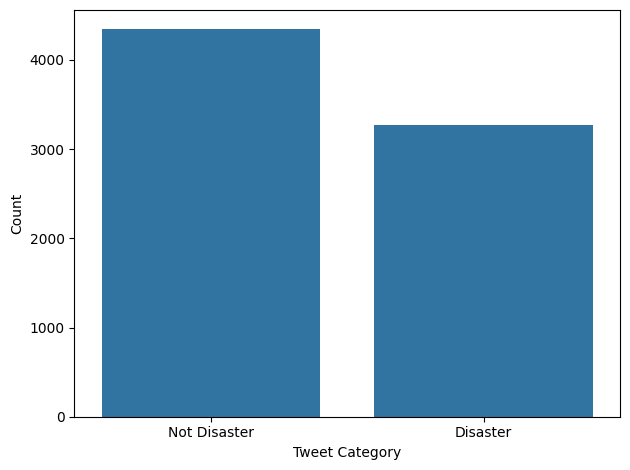

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
sns.countplot(x='target', data=train_df)
plt.xlabel('Tweet Category')
plt.xticks([0, 1], ['Not Disaster', 'Disaster'])
plt.ylabel('Count')
plt.tight_layout()

In [7]:
# Analyze keywords
print(f"Number of unique keywords: {train_df['keyword'].nunique()}")
print(f"Percentage of tweets with keywords: {100 * (1 - train_df['keyword'].isna().mean()):.2f}%")

# Top 10 most common keywords
top_keywords = train_df['keyword'].value_counts().head(10)
print("\nTop 10 most common keywords:")
print(top_keywords)

Number of unique keywords: 221
Percentage of tweets with keywords: 99.20%

Top 10 most common keywords:
keyword
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: count, dtype: int64


In [8]:
# Top 10 most common locations
top_locations = train_df['location'].value_counts().head(10)
print(top_locations)

location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


In [9]:
train_df['text_length'] = train_df['text'].str.len()
train_df['text_length']

0        68
1        37
2       130
3        56
4        85
       ... 
7608     60
7609     97
7610     27
7611    132
7612     68
Name: text_length, Length: 7613, dtype: int64

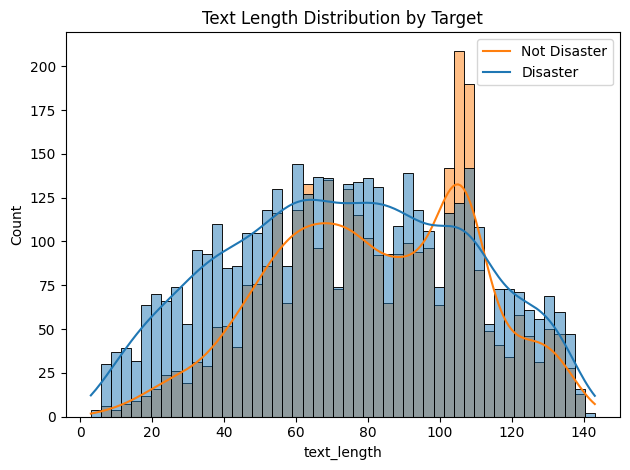

In [10]:
# Visualize text length distribution by target
sns.histplot(data=train_df, x='text_length', hue='target', kde=True, bins=50)
plt.title('Text Length Distribution by Target')
plt.ylabel('Count')
plt.legend(['Not Disaster', 'Disaster'])
plt.tight_layout()

### Correlation between Keywords and Target

In [11]:
#  keywords most associated with disasters
keyword_target = train_df.groupby('keyword')['target'].mean().sort_values(ascending=False)
print(keyword_target)

keyword
debris         1.000000
wreckage       1.000000
derailment     1.000000
outbreak       0.975000
oil%20spill    0.973684
                 ...   
body%20bag     0.030303
blazing        0.029412
ruin           0.027027
body%20bags    0.024390
aftershock     0.000000
Name: target, Length: 221, dtype: float64


# Visualize top keywords and their disaster association

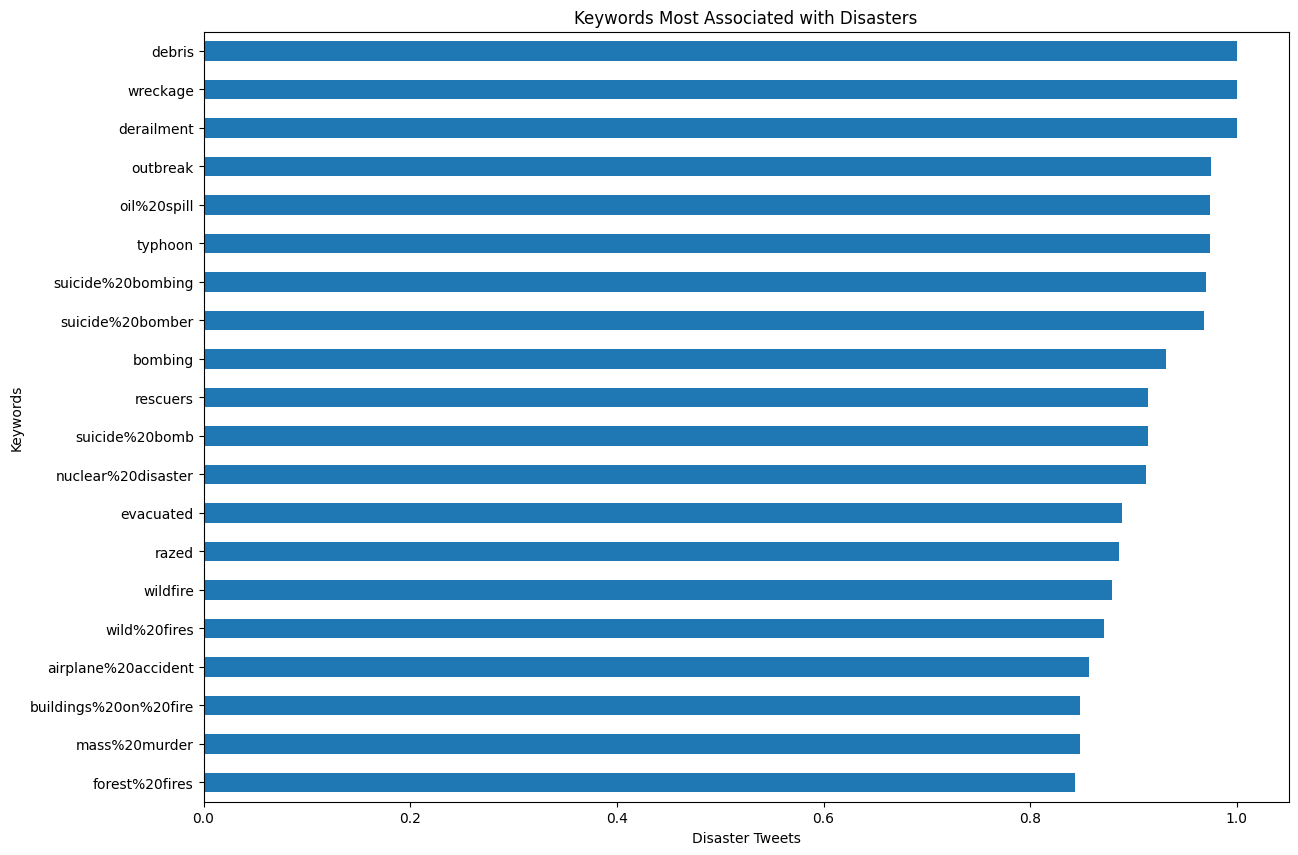

In [12]:
# Filter to keywords with at least 10 occurrences for more reliable results
keyword_counts = train_df['keyword'].value_counts()
common_keywords = keyword_counts[keyword_counts >= 10].index

# Filter keyword_target to include only common keywords
common_keyword_target = keyword_target[keyword_target.index.isin(common_keywords)]

# Plot top 20 most and least disaster-related common keywords
plt.figure(figsize=(14, 10))

common_keyword_target.head(20).sort_values().plot(kind='barh')
plt.title('Keywords Most Associated with Disasters')
plt.xlabel('Disaster Tweets')
plt.ylabel('Keywords')
plt.show()


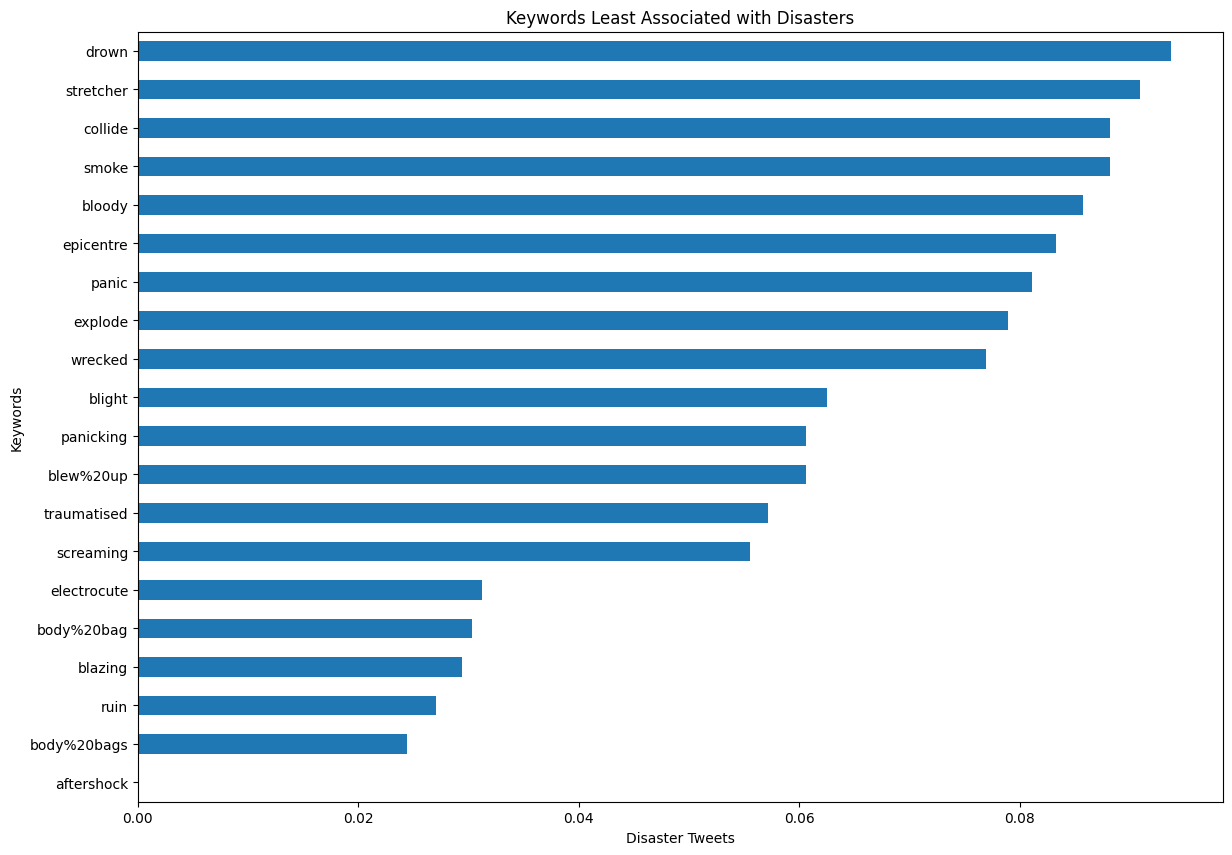

In [13]:
plt.figure(figsize=(14, 10))
common_keyword_target.tail(20).sort_values().plot(kind='barh')
plt.title('Keywords Least Associated with Disasters')
plt.xlabel('Disaster Tweets')
plt.ylabel('Keywords')

plt.show()

In [14]:
train_df['unique_word_count'] = train_df['text'].apply(lambda x: len(set(x.split())))

train_df['unique_word_count']

0       13
1        7
2       18
3        7
4       15
        ..
7608    10
7609    15
7610     6
7611    19
7612    11
Name: unique_word_count, Length: 7613, dtype: int64

In [15]:
# TODO: What is this?
train_df['frequent_words'] = train_df['text'].apply(lambda x: ' '.join(pd.Series(x.split()).value_counts().head(5).index))

train_df['frequent_words']

0                         Our Deeds are the Reason
1                        Forest fire near La Ronge
2                         shelter in place are All
3       people receive wildfires evacuation orders
4                          from Just got sent this
                           ...                    
7608                    Two giant cranes holding a
7609                             of in the The out
7610                          M UTCkm S of Volcano
7611     Police Little threatening nonlife serious
7612                   The Latest More Homes Razed
Name: frequent_words, Length: 7613, dtype: object

WordCloud

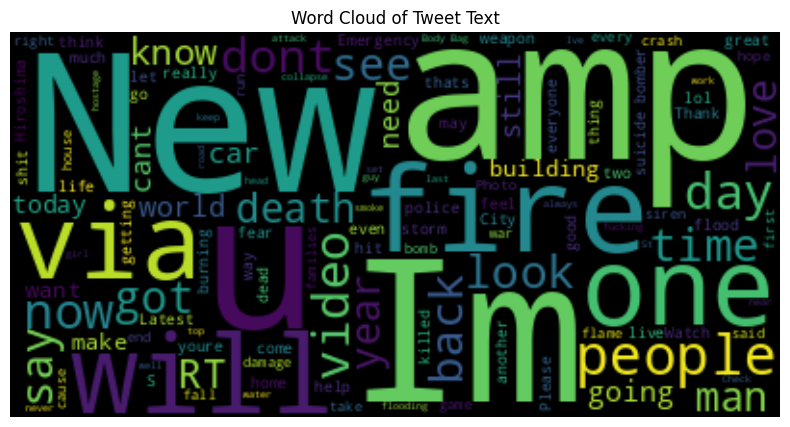

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(train_df['text'].dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.show()

Tokenization

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/balaji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/balaji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
train_df['tokens'] = train_df['text'].apply(word_tokenize)
train_df['tokens'].head()

0    [Our, Deeds, are, the, Reason, of, this, earth...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [Just, got, sent, this, photo, from, Ruby, Ala...
Name: tokens, dtype: object

Stopword Removal: Remove common words

In [26]:
stop_words = set(stopwords.words('english'))
train_df['clean_tokens'] = train_df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
train_df['clean_tokens'].head()

0    [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, Ruby, Alaska, smoke, wildfi...
Name: clean_tokens, dtype: object

Vectorization: Convert text into numerical format using TF-IDF

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# join tokens back to string for vectorizer
train_df['clean_text'] = train_df['clean_tokens'].apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df["target"]